In [185]:
# Importing dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import utils

# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [186]:
# Calling all csv files related to organ and survival rate 

survival_by_type= pd.read_csv('Resources/survival_donor_type_df.csv')
survival_by_age= pd.read_csv('Resources/survival_age_df.csv')
survival_by_diagnoses= pd.read_csv('Resources/survival_diagnose_df.csv')
cPRA_scores= pd.read_csv('Resources/clean_cPRA.csv').drop(columns=['Med. Center', 'Unnamed: 0'])

med_centers= pd.read_csv('Resources/latLong.csv').drop(columns=['All Centers Hospital Name', 'Address', 'Unnamed: 5',
                                                      'lat/long', 'Hospital Name'])

med_centers.head()
# survival_by_age.head()
# cPRA_scores.head()
# survival_by_type.head()
# survival_by_diagnoses.head()


# survival_by_type.Organ.unique()
print(len(med_centers))
# print(len(survival_by_diagnoses))
# print(len(survival_by_age))

345


In [187]:
# Merging, joining, and filtering data for final combined DataFrame

survival_df= pd.merge(survival_by_age, survival_by_diagnoses, on='Organ', how='inner')
survival_df
joined_df= survival_df.join(cPRA_scores)
# joined_df

filtered_df= joined_df.drop(columns= ['_id_x', 'Region_x','_id_y', 'Region_y'])
filtered_df
filtered_df['Years_Post_Transplant_x'] = filtered_df['Years_Post_Transplant_x'].str.replace(r'Year', '').astype(float)
filtered_df['Years_Post_Transplant_y'] = filtered_df['Years_Post_Transplant_y'].str.replace(r'Year', '').astype(float)
# filtered_df.Organ.unique()
main_df= filtered_df.copy()
main_df=main_df.dropna()
main_df.head()



print(len(main_df))


1151


In [188]:
# Renaming columns and finding the averages and sums for certain columns to condense. 

main_df['Survival Rate'] =  main_df[['Survival_Rate_x', 'Survival_Rate_y']].mean(axis=1)
main_df['Years Post Transplant'] = main_df[['Years_Post_Transplant_y', 'Years_Post_Transplant_x']].mean(axis=1)
main_df['Number Functioning or Alive'] = main_df["Number_Functioning_or_Alive_y"] + main_df["Number_Functioning_or_Alive_x"]





final_df= main_df.drop(columns=['Survival_Rate_y', 'Survival_Rate_x', 'Number_Functioning_or_Alive_x', 
                          'Number_Functioning_or_Alive_y','Years_Post_Transplant_x', 'Years_Post_Transplant_y'])

final_df.join(med_centers)

joined_df= final_df.join(med_centers)


joined_df['Med. Center'] = joined_df["All Centers"]
clean_df= joined_df.drop(columns=['All Centers']).dropna()
clean_df.head()
# print(len(final_df))
# final_df= main_df.join(med_centers) 

,Organ,Recipient_Age,Recipient_Diagnose_Category,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Survival Rate,Years Post Transplant,Number Functioning or Alive,State Abv,Med. Center
0,Heart,< 1 Year,Valvular Heart Disease,0,9,0.0,0.0,0.0,0.0,89.20,1.0,515,AL,ALAM-TX1
1,Heart,< 1 Year,Retransplant/Graft Failure,20-79,1,0.0,0.0,0.0,0.0,77.85,3.0,629,AL,ALCH-TX1
2,Heart,< 1 Year,Cardiomyopathy,98-100,5,0.0,0.0,0.0,0.0,89.70,1.0,5440,AL,ALUA-TX1
3,Heart,< 1 Year,Cardiomyopathy,0,622,0.0,3.0,7.0,0.0,87.25,2.0,4588,AL,ALVA-TX1
4,Heart,< 1 Year,Valvular Heart Disease,1-19,46,0.0,0.0,0.0,0.0,88.05,2.0,513,AR,ARBH-TX1


<AxesSubplot:ylabel='Frequency'>

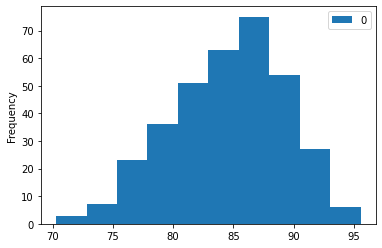

In [189]:
X= clean_df.drop(columns='Survival Rate')
y= pd.DataFrame(clean_df['Survival Rate'].values.reshape(-1,1))
# y.columns["Avg. Survival Rate"]

y.plot.hist()

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_test.shape, y_test.shape)

y_train
X_train.head()

(114, 13) (114, 1)


,Organ,Recipient_Age,Recipient_Diagnose_Category,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Years Post Transplant,Number Functioning or Alive,State Abv,Med. Center
15,Heart,< 1 Year,Other,1-19,25,0.0,0.0,0.0,0.0,1.0,592,CA,CABH-TX1
6,Heart,< 1 Year,Congenital Heart Disease,80-97,53,0.0,2.0,0.0,0.0,3.0,415,AR,ARUA-TX1
244,Heart,50-64 Years,Congenital Heart Disease,80-97,48,0.0,0.0,4.0,0.0,4.0,3383,PA,PAAE-TX1
222,Heart,35-49 Years,Retransplant/Graft Failure,1-19,3,0.0,0.0,0.0,0.0,4.0,1622,OH,OHCC-TX1
93,Heart,35-49 Years,Retransplant/Graft Failure,98-100,8,0.0,0.0,0.0,0.0,2.0,1870,IL,ILCM-TX1


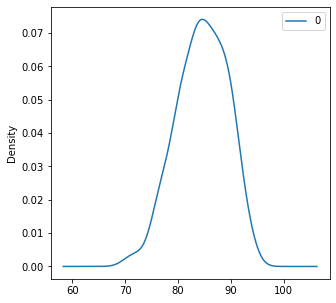

In [191]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
y_train.plot(kind='density', subplots=True, ax=ax)

plt.show()


<ipython-input-192-dfd3b20e1f91>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_train.hist(ax=ax)


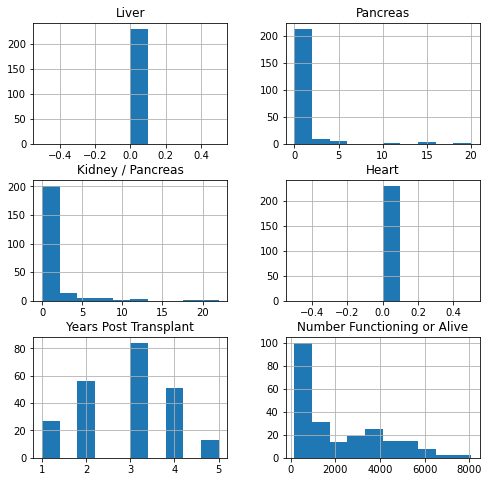

In [192]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
X_train.hist(ax=ax)
plt.show()

In [205]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

X_train_copy = pd.DataFrame(X_train.copy())
# X_test_copy = pd.DataFrame(X_test.copy())
X_train_copy.head()
# label_encoder.fit(X_test_copy)
# label_encoder.transform(data)

# label_encoder.classes_


,Organ,Recipient_Age,Recipient_Diagnose_Category,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Years Post Transplant,Number Functioning or Alive,State Abv,Med. Center
15,Heart,< 1 Year,Other,1-19,25,0.0,0.0,0.0,0.0,1.0,592,CA,CABH-TX1
6,Heart,< 1 Year,Congenital Heart Disease,80-97,53,0.0,2.0,0.0,0.0,3.0,415,AR,ARUA-TX1
244,Heart,50-64 Years,Congenital Heart Disease,80-97,48,0.0,0.0,4.0,0.0,4.0,3383,PA,PAAE-TX1
222,Heart,35-49 Years,Retransplant/Graft Failure,1-19,3,0.0,0.0,0.0,0.0,4.0,1622,OH,OHCC-TX1
93,Heart,35-49 Years,Retransplant/Graft Failure,98-100,8,0.0,0.0,0.0,0.0,2.0,1870,IL,ILCM-TX1


In [214]:
# example of making a single class prediction
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

X_train_dummies = pd.get_dummies(X_train_copy)


# # fit final model
model = LinearRegression()
model.fit(X_train, y_train)

print(f'Score of the LinearRegression model: {model.score(X_train, y_train)}')
print(f'The models intercept: {model.intercept_}')

# print(model.coef_)
X_train.head()

Score of the LinearRegression model: 1.0
The models intercept: [91.45366095]


,Liver,Pancreas,Kidney / Pancreas,Heart,Years Post Transplant,Number Functioning or Alive,Organ_Heart,Recipient_Age_1-5 Years,Recipient_Age_11-17 Years,Recipient_Age_18-34 Years,...,Med. Center_ VARM-TX1,Med. Center_ VAUV-TX1,Med. Center_ VTMC-TX1,Med. Center_ WAUW-TX1,Med. Center_ WICH-TX1,Med. Center_ WIMC-TX1,Med. Center_ WISE-TX1,Med. Center_ WISL-TX1,Med. Center_ WVCA-TX1,Med. Center_ WVWU-TX1
15,0.0,0.0,0.0,0.0,1.0,592,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,2.0,0.0,0.0,3.0,415,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,0.0,0.0,4.0,0.0,4.0,3383,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0.0,0.0,0.0,0.0,4.0,1622,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0.0,0.0,0.0,0.0,2.0,1870,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
# Assessing performance of LinearRegression model

from sklearn.model_selection import KFold

scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X_train_dummies, y_train)):
 model.fit(X_train_dummies.iloc[train,:], y_train.iloc[train,:])
 score = model.score(X_train_dummies.iloc[test,:], y_train.iloc[test,:])
 scores.append(score)

print(f"KFold performance scores: {scores}")

KFold performance scores: [0.8132003738038671, 0.8745101523391281, 0.8644765159183967]


In [216]:
y_pred = pd.DataFrame(model.predict(X_train))
y_test= pd.DataFrame(y_train)

pred_and_actual= pd.concat([y_train, y_pred], axis=1).dropna()
pred_and_actual.columns= ['Actual', 'Predicted']
pred_and_actual.head()
# y_predicted_df = pd.DataFrame(({"Actual": [y_train], 
#                                "Predicted":[y_pred]}))
# y_predicted_df
print(len(y_test))
# print(len(y_pred))

231


In [217]:
from sklearn import metrics

# print(y_test.shape)

# Value of root mean squared error is 1.0,  which is less than 10% of mean value
# Algorithm did okay? 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4377246602374824
Mean Squared Error: 1.019451465531172
Root Mean Squared Error: 1.0096788922876283


In [218]:
import pickle
from sklearn import model_selection

filename= 'finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    
with open(filename, 'rb') as file:
    pickle_model= pickle.load(file)

In [224]:
X_test_dummies= pd.get_dummies(X_test)
X_test_dummies.head()
print(X_test_dummies.shape)
print(y_test.shape)

(114, 259)
(231, 1)


In [225]:
# score= pickle_model.score(X_test_dummies, y_test)

In [177]:
# loaded_model= pickle.load(open(filename, 'rb'))
# result= loaded_model.score(X_test, y_test)
# # print(result)